In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential 
from keras.layers import Dense , LSTM , Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score

/home/prerit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
dataframe = read_csv('PT08_S1_CO.csv', usecols=[1,2,3,4,5,6], engine='python', skipfooter=3)

In [4]:
dataframe[:5]

,target,Tm1,Tm2,Tm3,Tm4,Tm5
0,1197.0,1272.0,1376.0,1402.0,1292.0,1360.0
1,1185.0,1197.0,1272.0,1376.0,1402.0,1292.0
2,1136.0,1185.0,1197.0,1272.0,1376.0,1402.0
3,1094.0,1136.0,1185.0,1197.0,1272.0,1376.0
4,1010.0,1094.0,1136.0,1185.0,1197.0,1272.0


In [5]:
len(dataframe)

9349

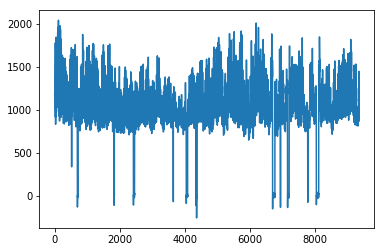

In [6]:
dataset = read_csv('PT08_S1_CO.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [7]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size

In [10]:
train_size

7479

In [11]:
trainX ,trainY= dataset[0:train_size,1:],dataset[0:train_size,0]
testX,testY = dataset[train_size:len(dataset),1:],dataset[train_size:len(dataset),0]

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
trainX.shape[1]

1

In [14]:
from keras.optimizers import Adam,SGD
from keras import optimizers
from keras import regularizers

In [15]:
import random

In [16]:
random.seed(5)

In [23]:
model = Sequential()
look_back = 5

In [24]:
model.add(LSTM(5,input_shape = (1,look_back),kernel_regularizer = regularizers.l2(0.01),activity_regularizer
               = regularizers.l1(0.01)))
model.add(Dense(1))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['mae','mape'])
history1 = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 11s - loss: 0.0169 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 49636.6131
Epoch 2/50
 - 11s - loss: 0.0058 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 32117.9512
Epoch 3/50
 - 11s - loss: 0.0046 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 20001.8046
Epoch 4/50
 - 11s - loss: 0.0043 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 21202.6245
Epoch 5/50
 - 11s - loss: 0.0042 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 18126.5431
Epoch 6/50
 - 15s - loss: 0.0041 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 23284.6663
Epoch 7/50
 - 11s - loss: 0.0041 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 22990.7502
Epoch 8/50
 - 11s - loss: 0.0040 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 18681.2035
Epoch 9/50
 - 11s - loss: 0.0040 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 18051.0456
Epoch 10/50
 - 11s - loss: 0

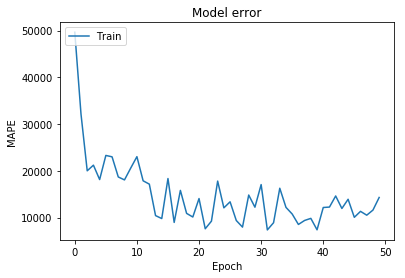

In [42]:
plt.plot(history1.history['mean_absolute_percentage_error'])
##plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

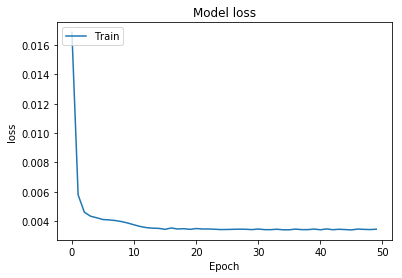

In [28]:
plt.plot(history1.history['loss'])
##plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
trainPredict = model.predict(trainX)

In [19]:
trainX = dataset[0:train_size,1:]

In [20]:
plt.plot(trainX,color='b')

In [21]:
plt.plot(trainPredict,color = 'r')

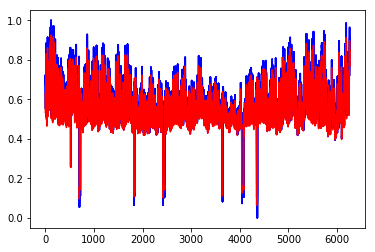

In [22]:
plt.show()

In [23]:
testPredict = model.predict(testX)

In [24]:
r2_score(testPredict,testY)

0.8413186487317342

# CYCLICAL MODEL

In [29]:
from lr_utils.keras_lr_finder import LRFinder
from lr_utils.keras_SGDR import SGDRScheduler
from lr_utils.keras_CLR import CyclicLR
from keras.callbacks import EarlyStopping

In [30]:
batch_size = 15
model.compile(loss='mean_squared_error',optimizer='SGD',metrics=['accuracy','mae','mape'])
lr_finder = LRFinder(min_lr=1e-5, max_lr=1e-2, steps_per_epoch=np.ceil(trainX.shape[0]/batch_size), epochs=1)
model.fit(trainX, trainY, callbacks=[lr_finder] )

Epoch 1/1
7479/7479 [==============================] - 1s 137us/step - loss: 0.0075 - acc: 2.6742e-04 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 13493.2624


In [31]:
lr_finder.plot_loss()

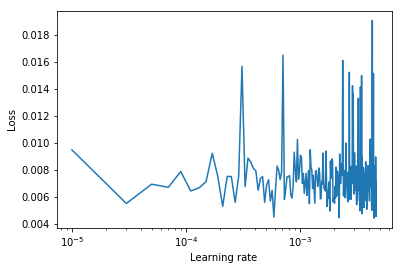

In [32]:
plt.show()

In [33]:
lr_finder.plot_avg_loss()

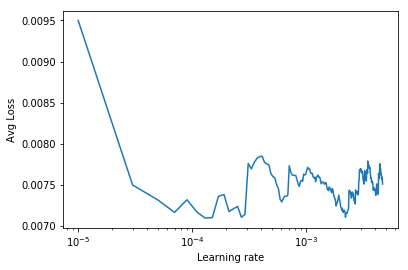

In [34]:
plt.show()

In [47]:
clr_triangular = CyclicLR(mode='triangular', step_size=np.ceil(trainX.shape[0]/batch_size))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy','mae','mape'])

In [48]:
historyf = model.fit(trainX, trainY, batch_size=128, epochs=50, validation_data=(testX, testY), callbacks=[clr_triangular])

Train on 7479 samples, validate on 1870 samples
Epoch 1/50
7479/7479 [==============================] - 1s 112us/step - loss: 0.0052 - acc: 2.6742e-04 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 13049.0150 - val_loss: 0.0047 - val_acc: 0.0000e+00 - val_mean_absolute_error: 0.0307 - val_mean_absolute_percentage_error: 7.6547
Epoch 2/50
7479/7479 [==============================] - 0s 20us/step - loss: 0.0052 - acc: 2.6742e-04 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 15043.3421 - val_loss: 0.0047 - val_acc: 0.0000e+00 - val_mean_absolute_error: 0.0303 - val_mean_absolute_percentage_error: 7.4487
Epoch 3/50
7479/7479 [==============================] - 0s 20us/step - loss: 0.0053 - acc: 2.6742e-04 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 13497.1164 - val_loss: 0.0053 - val_acc: 0.0000e+00 - val_mean_absolute_error: 0.0350 - val_mean_absolute_percentage_error: 7.9357
Epoch 4/50
7479/7479 [==============================] - 0s 2

7479/7479 [==============================] - 0s 25us/step - loss: 0.0050 - acc: 2.6742e-04 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 13174.8352 - val_loss: 0.0044 - val_acc: 0.0000e+00 - val_mean_absolute_error: 0.0299 - val_mean_absolute_percentage_error: 7.2522
Epoch 29/50
7479/7479 [==============================] - 0s 24us/step - loss: 0.0050 - acc: 2.6742e-04 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 13117.3087 - val_loss: 0.0046 - val_acc: 0.0000e+00 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 7.8793
Epoch 30/50
7479/7479 [==============================] - 0s 20us/step - loss: 0.0050 - acc: 2.6742e-04 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 13982.1601 - val_loss: 0.0047 - val_acc: 0.0000e+00 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 7.2806
Epoch 31/50
7479/7479 [==============================] - 0s 25us/step - loss: 0.0049 - acc: 2.6742e-04 - mean_absolute

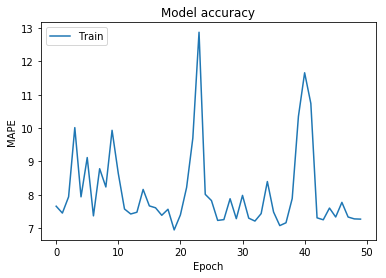

In [49]:
plt.plot(historyf.history['val_mean_absolute_percentage_error'])
##plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])